# Homework 1: 

### Deadline: Thursday 11 April 2024 (by 19h00)
### Credits: 20 points

# Name: Males-Araujo Yorlan

### 1. (7 points) Orbital dynamics

This problem consists of computing and displaying the orbits of Mars' moons (Phobos and Deimos) around Mars and the Sun:

- Phobos has an orbital period of $T_{phobos} = 7.65\,\rm hours$ around Mars and is located at a distance of $5.99\times 10^3\,\rm km$ from Mars.


- Deimos has an orbital period $T_{deimos} = 30.30\,\rm hours$ around Mars and is located at a distance of $2.35\times 10^4\,\rm km$ from Mars.

For simplicity, we can assume that all the orbits are circular. Thus, the Mars' orbit around the Sun is described by the following parametric equations:

$$x_{mars} = R\,\cos(\omega_{mars}\,t)$$

$$y_{mars} = R\,\sin(\omega_{mars}\,t)$$

where $R=2.1\times 10^8\,\rm km$ is the Sun-Mars distance, $\omega_{mars}=2\pi/T_{mars}$, and $T_{mars} = 687\,\rm days$.


Similarly, the orbits of each moon ($i$) is the sum of its position relative to Mars and the position of Mars relative to the Sun (which is at the origin), so:

$$x_{i} = x_{mars} + r_i\,\cos(\omega_{i}\,t)$$

$$y_{i} = y_{mars} + r_i\,\sin(\omega_{i}\,t)$$

where $i$ refers to either Phobos and Deimos, $r_i$ to their distances from Mars, and $\omega_{i}=2\pi/T_{i}$ refers to their respective angular frequencies.

#### (a) Create a python function that takes the period ($T$) as argument and returns the angular frequency ($\omega$) of any body.

In [7]:
# Importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from astropy.io import fits
import skimage
from skimage.feature import peak_local_max

In [2]:
# Function:
def angular_freq(T):
    """
    Computes the angular frequency of any body.
    Input: T -> Period
    Ouput: omega -> Angular frequency.
    Author: MAY.
    Date: 04/04/2024
    """
    # We simply use the well-known relation.
    # (Specific units depend on the input).
    omega = 2*np.pi/T
    return omega

#### (b) Then, call your function in (a) and assign to three global python variables the angular frequencies of: i) Mars while orbiting around the Sun, (ii) Phobos, and (iii) Deimos orbiting around Mars.

In [3]:
# We will work with the time in days. So,

t_mars = 687*24*60 # minutes
t_phobos = 7.65*60 # minutes
t_deimos = 30.30*60 # minutes

# Now we call our function to get the respective angular frequencies:

ang_mars = angular_freq(t_mars) # minutes^(-1)
ang_phobos = angular_freq(t_phobos) # minutes^(-1)
ang_deimos = angular_freq(t_deimos) # minutes^(-1)

# And put the last two in an array because it might be useful later:
ang_moons = np.array([ang_phobos, ang_deimos])

#### (c) Create a vector for time, $t$, that spans from $0$ to $687 \,\rm days$, and define $R$ and $r_i$ as global variables.

In [4]:
# Creating the time vector:
t = np.arange(0,687*24*60+1,1) # minutes

# Now R and r_i:
R = 2.1e8 #km
r_moons = np.array([5.99e3, 2.35e4]) #km (with [0] being Phobos, and [1] Deimos)

#### (d) Create a python function that takes $R$, $r_i$, $t$ as arguments and returns $x_{i}$ and $y_{i}$ for either Phobos or Deimos.

In [5]:
# Function:
def parametric_eqs(R, r_moons, t):
    """
    Gets the parametric values for circular orbits 
    of a planet and two of its moons. All around the sun.
    Inputs: R -> radius of the planet's orbit
            r_moons -> radii of the two moons around the planet
            t -> time vector
    Outputs: All the 6 orbits around the sun.
    Author: MAY.
    Date: 04/04/2024
    """
    # We define the parametrizations for Mars:
    x_mars = R*np.cos(ang_mars*t)
    y_mars = R*np.sin(ang_mars*t)

    # And then we do it for each moon:
    x_phobos = x_mars + r_moons[0]*np.cos(ang_moons[0]*t)
    y_phobos = y_mars + r_moons[0]*np.sin(ang_moons[0]*t)

    x_deimos = x_mars + r_moons[1]*np.cos(ang_moons[1]*t)
    y_deimos = y_mars + r_moons[1]*np.sin(ang_moons[1]*t)
    
    return x_mars, y_mars, x_phobos, y_phobos, x_deimos, y_deimos

#### (e) Then, call your function in (d), retrieve $x_{i}$ and $y_{i}$, and save them into a CSV file with 7 columns: $t$, $x_{mars}$, $y_{mars}$, $x_{phobos}$, $y_{phobos}$, $x_{deimos}$, $y_{deimos}$.

In [6]:
# Getting everything into arrays:
x_mars, y_mars, x_phobos, y_phobos, x_deimos, y_deimos = parametric_eqs(R, r_moons, t)

# Now saving them into, first,  a pandas DF:
df_orbits = pd.DataFrame({"Time [days]": t,
                          "x_mars [km]": x_mars, "y_mars [km]": y_mars,
                          "x_phobos [km]": x_phobos , "y_phobos [km]": y_phobos,
                          "x_deimos [km]": x_deimos, "y_deimos [km]": y_deimos}, index=None)

# And , second, a csv file:
df_orbits.to_csv("orbits.csv", ",", float_format = "{:.4e}".format)

I'm aware there might be better ways of doing it without having to call each one, but it works.

#### (f) Make a 2D Cartesian plot, with the Sun in the origin, showing the orbits of Mars, Phobos, and Deimos around the Sun for a full Martian year. Which orbit is more intricate?

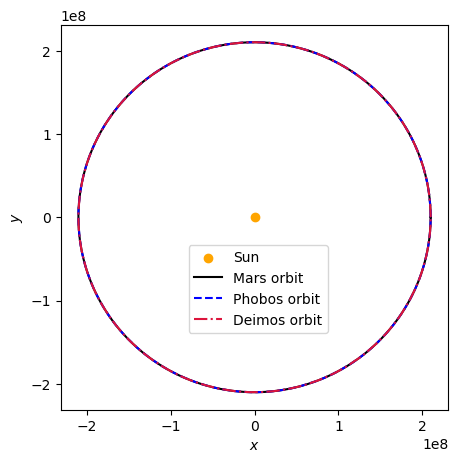

In [7]:
# Plotting:
plt.figure(figsize=(5,5))

plt.scatter(0, 0, marker = "o", color="orange", label="Sun")

plt.plot(x_mars, y_mars, color="k" , label="Mars orbit")
plt.plot(x_phobos, y_phobos, linestyle="--", color="b", label = "Phobos orbit")
plt.plot(x_deimos, y_deimos, linestyle="-.", color="crimson", label = "Deimos orbit")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.legend(loc=(0.33,0.20))
plt.show()
plt.close()

The Sun and Mars orbit are as expected, and I think the problem with the other two orbits is that the radius of the Mars orbit is very large in comparison with the other two.

Zooming in might let us see.

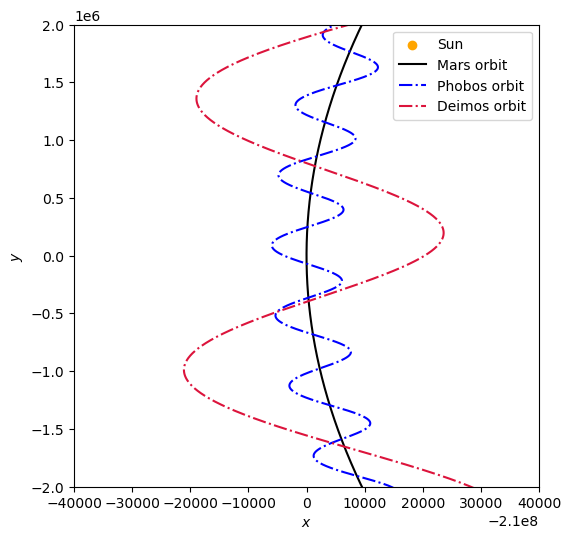

In [8]:
# Plotting: Zoomed image.
plt.figure(figsize=(6,6))

plt.scatter(0, 0, marker = "o", color="orange", label="Sun")

plt.plot(x_mars, y_mars, color="k" , label="Mars orbit")
plt.plot(x_phobos, y_phobos, linestyle="-.", color="b", label = "Phobos orbit")
plt.plot(x_deimos, y_deimos, linestyle="-.", color="crimson", label = "Deimos orbit")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.xlim(-2.1e8-40000, -2.1e8+40000)
plt.ylim(-2000000,2000000)

plt.legend(loc="best")
plt.show()
plt.close()

That allowed us to see the orbits of the moons. With this, we can conclude that it is the Phobos orbit the one that is more intricate since it varies more than the other two. 

#### (g) Make a 2D Cartesian plot, with Mars in the origin, showing the orbits of Phobos and Deimos around it for a full Deimos period.

We only need to plot the parametrizations of both moons subtracting the Mars' orbit values from them.

In [9]:
# It's done as follows:
x_phobos_mars = x_phobos - x_mars
y_phobos_mars = y_phobos - y_mars

x_deimos_mars = x_deimos - x_mars
y_deimos_mars = y_deimos - y_mars

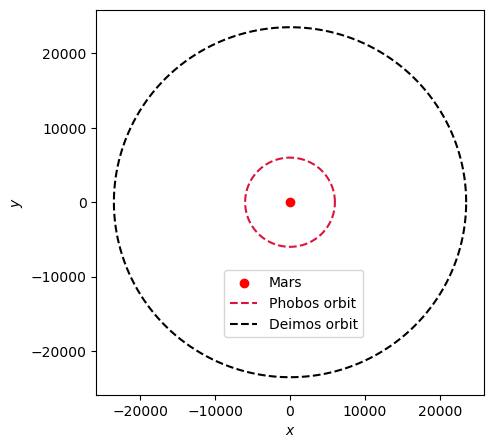

In [10]:
# Plotting: 
plt.figure(figsize=(5,5))

plt.scatter(0, 0, color= "r", label = "Mars")

plt.plot(x_phobos_mars[0:460], y_phobos_mars[0:460],   # 460 minutes ~ 7.65 hours
         linestyle="--", color="crimson" , label="Phobos orbit") 
plt.plot(x_deimos_mars[0:1818], y_deimos_mars[0:1818], # 1818 minutes ~ 30.30 hours
         linestyle="--", color="k", label = "Deimos orbit")      

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.legend(loc=(0.33, 0.15))
plt.show()
plt.close()

Seems good, but it didn't, at first, because I was making the mistake of overlapping many orbits. That's why I sliced the elements of the arrays to get only one complete orbit for each. 

### 2. (7 points) Spectral fitting

This problem consists of fitting spectral lines and finding the relative velocities between multiple Gaussian components (interstellar gas clouds).

The supplied data file:

https://github.com/wbandabarragan/computational-physics-1/tree/main/sample-data/j074814-7435_gass_spectra.dat


contains observational data from the Parkes radio telescope (see https://en.wikipedia.org/wiki/Parkes_Observatory).

The data corresponds to $\rm H\,I$ clouds in the Chamaeleon molecular cloud complex (see https://en.wikipedia.org/wiki/Chamaeleon_complex).

This data file contains emission line features from neutral hydrogen ($\rm H\,I$, i.e., $\lambda = 21\,\rm cm$) in the Milky Way. The second column has gas velocities (in $\rm km\,s^{-1}$) and the third column emission intensity (called brightness temperature in $K$). We can assume that each gas cloud in our line of sight produces a Gaussian emission feature that is only dependent on the column density if the gas is optically thin.

Carry out the following calculations using python: 

#### (a) Create a python function that reads in the spectral data (velocity and intensity) from the file, and returns them as arrays. **Hint:** You need to jump over the header of the data file.

In [11]:
# Having inspecting the data, we define the function:

def spectral_data(filename):
    """
    Reads in a file with information on spectral fitting
    and gets two arrays: one for velocities and the other 
    with intensity. It skips the header.
    Input: filename -> variable storing the file
    Outputs: velocity -> np.array with the velocities
             intensity -> np.arrat with the intensities
    Author: MAY
    Date: 05/04/2024
    """

    # We read in the file (skipping the header).

    file = pd.read_csv(filename, sep = "\s+", comment ="#", header = None)

    # Then we get the corresponding arrays via indexing:
    
    velocity = np.array(file[1])
    intensity = np.array(file[2])
    
    return velocity, intensity

In [12]:
# We call and use the function:
spectra = "data/j074814-7435_gass_spectra.dat"

velocity, intensity = spectral_data(spectra)

#### (b) Make a high-quality, labeled plot of the spectrum (velocity on the x-axis and intensity on the y-axis). How many "$\rm H\,I$ clouds" do you see? Note that each Gaussian-like feature represents a separate $\rm H\,I$ cloud. 

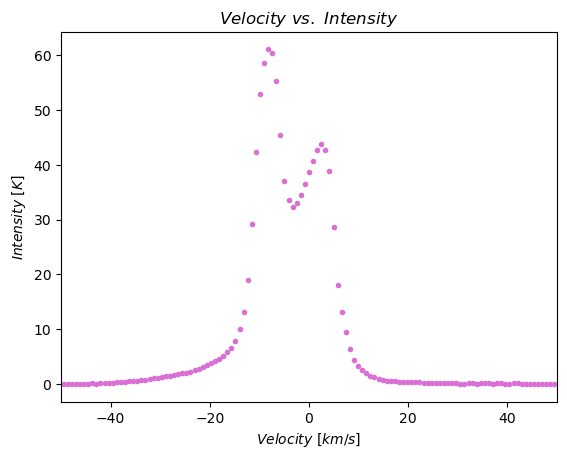

In [13]:
# We simply plot:
plt.figure()

plt.scatter(velocity, intensity, marker = ".", color="orchid")

plt.title(r"$Velocity\ vs.\ Intensity$")
plt.xlabel(r"$Velocity\ [km/s]$")
plt.ylabel(r"$Intensity\ [K]$")

plt.xlim(-50,50)
plt.show()
plt.close()

Evidently, there are two Gaussian-like features, that is, two $\rm H\,I$ clouds.

#### (c) Define an appropriate multi-Gaussian model for the spectrum and create a python function for it.

The model we'll use is a two-Gaussian one given by
$$ \phi(x) = a\ e^{-b(x+c)^2}+d\ e^{-f(x+g)^2}
$$
where $a,\ b,\ c,\ d,\ f $ and $g$ are constants to be determined.

In [14]:
# Function for the 1D two-Gaussian

def two_gauss(x, a, b, c, d, f, g):
    """
    Defines a two-Gaussian model for a regression.
    Inputs: x -> velocity vector 
            a,d -> the heights of the Gaussians
            b, e-> are the widths
            c, f -> are the displacements
    Output: phi -> 1D two-Gaussian model
    """
    
    # We get the equation:
    phi = a*np.exp(-b*(x + c)**2) + d*np.exp(-f*(x + g)**2)
    
    return phi

#### (d) Fit your model to the spectrum, and report the best-fit values for the free parameters with their respective uncertainties.

In [15]:
# We'll use curve_fit() function as we need to report uncertainties.
coef, cova = opt.curve_fit(two_gauss, velocity, intensity)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8724\411450246.py:14: RuntimeWarning: overflow encountered in exp
  phi = a*np.exp(-b*(x + c)**2) + d*np.exp(-f*(x + g)**2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8724\411450246.py:14: RuntimeWarning: overflow encountered in multiply
  phi = a*np.exp(-b*(x + c)**2) + d*np.exp(-f*(x + g)**2)


In [16]:
# Fittings
two_gaussian_fit = two_gauss(velocity, *coef)

In [17]:
# Reporting the uncertainties of the coefficients (1-sigma).

two_gauss_unc = np.sqrt(np.diag(cova))

print("Parameters estimates with uncertainties:")
print("\n")
print("a =", coef[0], "±", two_gauss_unc[0])
print("b =", coef[1], "±", two_gauss_unc[1])
print("c =", coef[2], "±", two_gauss_unc[2])
print("d =", coef[3], "±", two_gauss_unc[3])
print("f =", coef[4], "±", two_gauss_unc[4])
print("g =", coef[5], "±", two_gauss_unc[5])

Parameters estimates with uncertainties:


a = 60.2276464222906 ± 0.2524921395168533
b = 0.05628464743562763 ± 0.0007756801031673931
c = 8.173393127001168 ± 0.020972903285341293
d = 44.427479083888876 ± 0.23836504397539193
f = 0.043754005317697416 ± 0.0008012427860561296
g = -1.7039854945794364 ± 0.030209809971325146


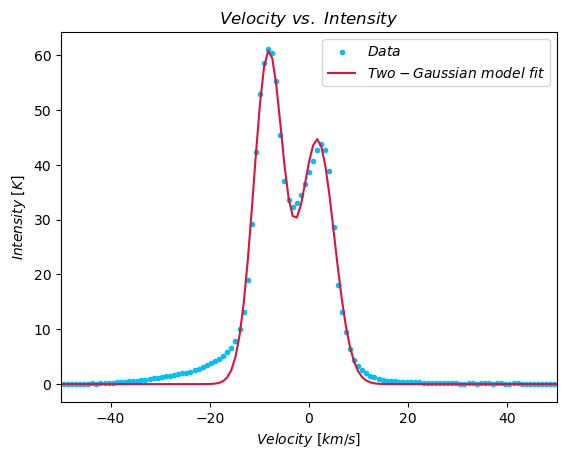

In [18]:
# Plotting everything together.
plt.figure()

plt.scatter(velocity, intensity, marker =".", color="deepskyblue", label=r"$Data$")

plt.plot(velocity, two_gaussian_fit, color="crimson", label=r"$Two-Gaussian\ model\ fit$")

plt.title(r"$Velocity\ vs.\ Intensity$")
plt.xlabel(r"$Velocity\ [km/s]$")
plt.ylabel(r"$Intensity\ [K]$")

plt.xlim(-50,50)
plt.legend(loc="best")

plt.show()
plt.close()

It looks fine.

#### (e) Make a high-quality, labeled plot that shows the original spectrum, the overall multi-Gaussian fit, and also each individual Gaussian component.

We need a one-Gaussian model where we use the parameters obtained just now. Its expression is

$$ \phi(x) = a\ e^{-b(x+c)^2}.$$

In [19]:
# Function for the one-Gaussian model:

def one_gaussian(x, a, b, c):
    """
    Defines a one-Gaussian model for the regression.
    Inputs: x -> velocity vector, 
            a -> the height of the Gaussian
            b -> the width ""
            c -> displacement ""
    Output: y -> 1D one-Gaussian model
    """
    
    # The expression
    phi = a*np.exp(-b*(x + c)**2)
    
    return phi

In [20]:
# Now we get the two individual Gaussians:

one_gaussian_1 = one_gaussian(velocity, coef[0], coef[1], coef[2])
one_gaussian_2 = one_gaussian(velocity, coef[3], coef[4], coef[5]) 

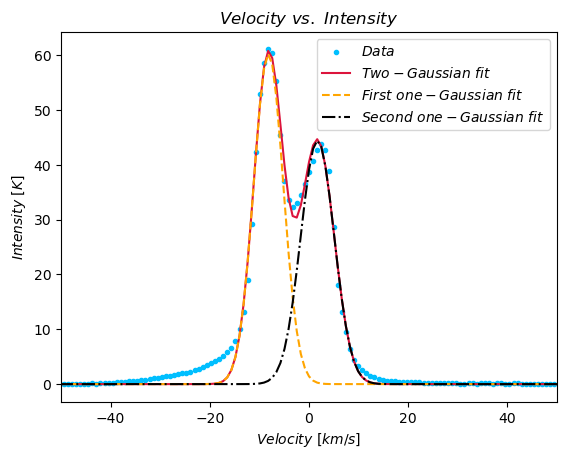

In [21]:
# And plot:
plt.figure()

plt.scatter(velocity, intensity, marker =".", color="deepskyblue", label=r"$Data$")

plt.plot(velocity, two_gaussian_fit, color="crimson", label=r"$Two-Gaussian\ fit$")

plt.plot(velocity, one_gaussian_1, linestyle = "--", color ="orange",
         label=r"$First\ one-Gaussian\ fit$")
plt.plot(velocity, one_gaussian_2, linestyle = "-.", color ="k",
        label=r"$Second\ one-Gaussian\ fit$")

plt.title(r"$Velocity\ vs.\ Intensity$")
plt.xlabel(r"$Velocity\ [km/s]$")
plt.ylabel(r"$Intensity\ [K]$")

plt.xlim(-50,50)
plt.legend(loc="best")

plt.show()
plt.close()

It seems to fit.

#### (f) Find the (velocity, intensity) coordinates of the maximum of each Gaussian component. **Note:** the velocity coordinates of the maxima are called central velocities.

Both points are given by the coefficients found. Velocities are given by the displacements and intensities by the heights.

In [22]:
print(f"The coordinates of the maximum in the first Gaussian component is {(coef[2], coef[0])}.")
print(f"The coordinates of the maximum in the second Gaussian component is {(coef[5], coef[3])}.")

The coordinates of the maximum in the first Gaussian component is (8.173393127001168, 60.2276464222906).
The coordinates of the maximum in the second Gaussian component is (-1.7039854945794364, 44.427479083888876).


They seem to strongly agree with the plot.

#### (g) Use the coordinates of the maxima computed in (f) to compare the central velocities of the clouds, and calculate the relative velocity between the clouds. 

We just use the classical addition of velocities. The difference in their velocities tells us which one has a higher kinetic energy and temperature.

In [23]:
print(f"The relative velocity between the HI clouds is {abs(coef[5]-coef[2])} km/s.")

The relative velocity between the HI clouds is 9.877378621580604 km/s.


### 3. (6 points) Distance between galaxies

The purpose of this exercise is to isolate features (galaxies) in an image by analysing the pixel information. The sample data correspond to NGC 1512 and its companion the dwarf galaxy NGC 1510 (see https://en.wikipedia.org/wiki/NGC_1512).

The provided data file:

https://github.com/wbandabarragan/computational-physics-1/tree/main/sample-data/skvNGC_1512.fits

contains optical images of the two galaxies from NASA's HEARSARC website (https://skyview.gsfc.nasa.gov/current/cgi/titlepage.pl). The FITS file contains an image in blue colour taken from the 2nd Digitized Sky Survey (DSS2 Blue).

Carry out the following analysis:

#### (a) Create a python function that reads in the data from the FITS file, and returns two objects: the image itself as a 2D array, and the value of the header key called "CDELT2", which reports the size of a pixel in degrees.

Let's first take a look at the data:

In [24]:
# Getting the data:
image = fits.open("/Users/DELL/Documents/Physics/CompPhysI/data/skvNGC_1512.fits")

galaxies_header = image[0].header
galaxies_data = image[0].data

print(np.unique(np.log10(galaxies_data)>3.4))

[False  True]


In [25]:
# Cheking the header to see the value of "CDELT2":
# print(galaxies_header)

In [26]:
# Now we are ready to define the asked function:
def data_fits(filename):
    """
    Given a .fits file, returns two variables
    with the data without the head, and the pixel size. 
    Input: filename -> variable storing the fits image
    Outputs: galaxies_d -> data
             pixel_size -> size of the pixel in degrees
    Date: 12/04/2024
    Author: MAY
    """
    # We get the fits-format image:
    image = fits.open(filename)

    # Get the header and the value for "CDELT2":
    galaxies_h = image[0].header
    pixel_size = galaxies_h["CDELT2"]

    # And the data:
    galaxies_d = image[0].data
    
    return galaxies_d, pixel_size

#### (b) Call your function in (a), and make a two-panel figure with high-quality, labeled plots of the image in pixel units and in degree units. **Hint:** Use the value of "CDELT2" for unit conversion.

In [27]:
# Calling the function:
image_file = "/Users/DELL/Documents/Physics/CompPhysI/data/skvNGC_1512.fits"
galaxies_data, pixel_in_degrees = data_fits(image_file)

In [28]:
# We multiply it to get it in degrees:
galaxies_degrees = galaxies_data*pixel_in_degrees

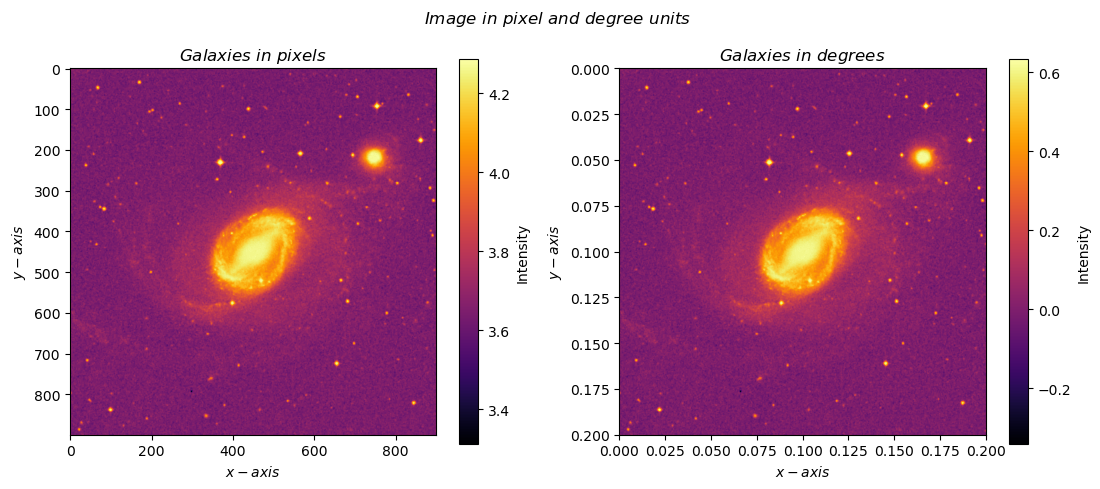

In [29]:
# And we plot the two-panel image:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
fig.suptitle(r"$Image\ in\ pixel\ and\ degree\ units$")

ax1.imshow(np.log10(galaxies_data), cmap = "inferno")
ax1.set_title(r"$Galaxies\ in\ pixels$")
ax1.set_xlabel(r"$x-axis$")
ax1.set_ylabel(r"$y-axis$")
cb1 = plt.colorbar(ax1.imshow(np.log10(galaxies_data), cmap = "inferno"))
cb1.set_label("Intensity")

ax2.imshow(np.log10(galaxies_degrees), cmap = "inferno",
           extent=[0, 900*pixel_in_degrees, 900*pixel_in_degrees, 0])
ax2.set_title(r"$Galaxies\ in\ degrees$")
ax2.set_xlabel(r"$x-axis$")
ax2.set_ylabel(r"$y-axis$")
cb1 = plt.colorbar(ax2.imshow(np.log10(galaxies_degrees), cmap = "inferno", 
                              extent=[0, 900*pixel_in_degrees, 900*pixel_in_degrees, 0]))
cb1.set_label("Intensity")

plt.show()

#### (c) Create a python funtion that receives the image as an argument and returns a masked image. The function should mask the background and any foreground stars, leaving only the regions containing the two galaxies in the image (i.e. the two largest regions in the image). **Hint:** Use thresholding, subsetting, and/or any other masking technique to select the areas of interest of the image.

In [30]:
# Defining the function:
def masking_galaxies(galaxies_data):
    """
    Given the data from a .fits file with galaxies and stars, removes
    the background and stars and leaves the regions with only the two
    galaxies in the image. 
    Input: galaxies_data -> variable containing the unmasked image
    Outputs: galaxies_pix -> the masked image in pixel units
             galaxies_def -> the masked image in degree units
    Date: 12/04/2024
    Author: MAY
    """

    # Here we isolate the sections that surpass the threshold:
    threshold = 4.0
    
    galaxies_stars_pix = np.where(np.log10(galaxies_data) > threshold,
                                  np.log10(galaxies_data), np.nan)

    # And here only the galaxies:
    # In pixels first. We cut them,
    gal_1 = galaxies_stars_pix[350:550 , 350:560]
    gal_2 = galaxies_stars_pix[200:240, 720:770]

    # Create a set with nan's only:
    galaxies_pix = np.full((900, 900), np.nan)

    # And add them there:
    galaxies_pix[350:550, 350:560] = gal_1
    galaxies_pix[200:240, 720:770] = gal_2

    # And now in degrees:

    galaxies_deg = galaxies_pix*pixel_in_degrees
    
    return galaxies_pix, galaxies_deg

#### (d) Call your function in (c), and make a two-panel figure with high-quality, labeled plots of the resulting masked image in pixel units and in degree units.

In [31]:
galaxies_pix, galaxies_deg = masking_galaxies(galaxies_data)

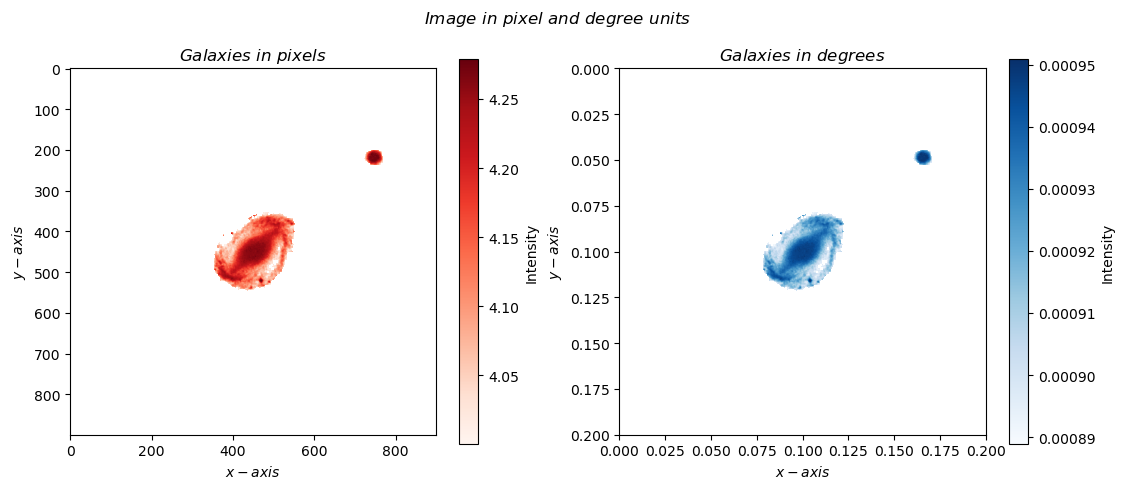

In [32]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
fig.suptitle(r"$Image\ in\ pixel\ and\ degree\ units$")

ax1.imshow(galaxies_pix, cmap = "Reds")
ax1.set_title(r"$Galaxies\ in\ pixels$")
ax1.set_xlabel(r"$x-axis$")
ax1.set_ylabel(r"$y-axis$")
cb1 = plt.colorbar(ax1.imshow(galaxies_pix, cmap = "Reds"))
cb1.set_label("Intensity")
#ax1.grid()

ax2.imshow(galaxies_deg, cmap = "Blues", 
          extent=[0, 900*pixel_in_degrees, 900*pixel_in_degrees, 0])
ax2.set_title(r"$Galaxies\ in\ degrees$")
ax2.set_xlabel(r"$x-axis$")
ax2.set_ylabel(r"$y-axis$")
cb2 = plt.colorbar(ax2.imshow(galaxies_deg, cmap = "Blues",
                              extent=[0, 900*pixel_in_degrees, 900*pixel_in_degrees, 0]))
cb2.set_label("Intensity")
#ax2.grid()

plt.show()

#### (e) Create a python funtion that identifies the centre of each galaxy, calculates the distance between the centres of the two galaxies, and returns such distance in pixels, degrees, and kiloparsecs. **Hint:** To convert the pixel units into degrees, use "CDELT2". To convert to physical distance units ($\rm kpc$), define an appropriate trigonometrical model and use the knowledge that these galaxies are at a distance of $12.5\,\rm Mpc$ from us.

The model used to get the distance in kiloparsecs assumed that both galaxies were at 12.5 $Mpc$ from us, and we added two right triangles from where we used the said distance as the hypotenuse of both triangles. An option to get the distance in kiloparsecs between them is given by
$$ \frac{\ell}{2} = 12500 \cdot \sin(\theta/2).
$$

In [33]:
def distances(galaxies_pix):
    """
    Identifies points close to the center of each galaxy,
    calculates the distance between them, and returns them
    in pixels, degrees asn kiloparsecs. 
    Inputs: galaxies_pix -> file with the masked image
    Outputs: pixels -> distance in pixels
             degrees -> distance in degrees
             kiloparsecs -> distance in kiloparsecs
             coor_max -> variable containing the peaks
    Date: 12/04/2024
    Author: MAY
    """
    # We transform the elements:
    np.nan_to_num(galaxies_pix, copy=False, nan = 0.)

    # We get the coordinates of the local maxima:
    coor_max = peak_local_max(galaxies_pix, min_distance = 50, num_peaks = 4)

    # And we get the distance, first, in pixels:
    pixels = np.sqrt((coor_max[0][1]-coor_max[2][1])**2+(coor_max[0][0]-coor_max[2][0])**2) # We are using appropiate points.

    # In degrees:
    degrees = pixels*pixel_in_degrees

    # In kiloparsecs:

    # (Getting the angle in radians)
    radians = (degrees*np.pi)/180

    kiloparsecs = 12500*2*(np.sin(radians/2))
    
    return pixels, degrees, kiloparsecs, coor_max

In [34]:
# Here we check that everything is alright while also asigning the variables to be used later. 
pixels, degrees, kiloparsecs, coor_max = distances(galaxies_pix)
print(pixels, degrees, kiloparsecs)

383.20751558391964 0.08515722568531547 18.578422915910892


#### (f) Make a high-quality, labeled plot of the masked image in physical units, showing the line connecting the centres of the galaxies and the physical distance value between them.

We are going to use the image in degree units and multiply everything by the number of kiloparsecs that are in a degree. This number, 213, was found using the line of 18.5 $Kpc$ as a ruler. 

In [35]:
# Here we transform the coordinates of the points to degrees, and then to kiloparsecs. 
coor_deg = coor_max*pixel_in_degrees*213

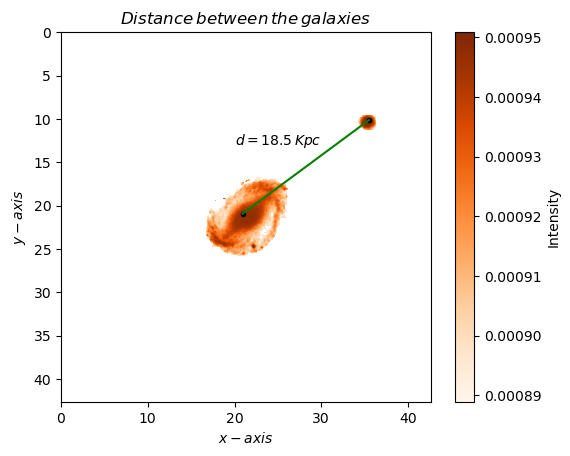

In [36]:
# And we plot everything.
fig, ax = plt.subplots()

Z = ax.imshow(galaxies_deg, cmap = "Oranges", extent=[0, 900*pixel_in_degrees*213, 900*pixel_in_degrees*213, 0])

ax.scatter(coor_deg[0][1], coor_deg[0][0], color = "k", marker= ".")
ax.scatter(coor_deg[2][1], coor_deg[2][0], color = "k", marker= ".")
ax.plot([coor_deg[0][1], coor_deg[2][1]], [coor_deg[0][0], coor_deg[2][0]], linestyle = "-", color = "green")

cb = plt.colorbar(ax.imshow(galaxies_deg, cmap = "Oranges", extent=[0, 900*pixel_in_degrees*213, 900*pixel_in_degrees*213, 0]))
cb.set_label("Intensity")

plt.text(20, 13, r"$d=18.5\,Kpc$")

plt.title(r"$Distance\, between\, the\, galaxies$")
plt.xlabel(r"$x-axis$")
plt.ylabel(r"$y-axis$")

plt.show()
plt.close()

It seems to have given good results; however, I am aware I should be more technical in that regard.